## Q Learning - table representation

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from env_simulator import ToyEnv

In [24]:
env = ToyEnv()
n_states = env.observation_space.shape[0]
n_actions = env.action_space.shape[0]
n_episodes = 5000
max_steps_per_ep = 100
gamma = 0.9
learning_rate = 0.8

In [35]:
Q = np.zeros([n_states, n_actions])

In [36]:
rewards = []
avg_rewards = []
for ep in range(n_episodes):
    s,r,done = env.reset()
    n_steps = 0
    ep_r = 0
    while not done:
        a = np.argmax(Q[s,:])
        s1,r,done = env.step(a)
        Q[s,a] += learning_rate*(r + gamma*max(Q[s1,:]) - Q[s,a]) # Temporal difference update
        s = s1
        ep_r += r
        n_steps += 1
        if n_steps > max_steps_per_ep:
            break
    rewards.append(ep_r)
    avg_rewards.append(sum(rewards[-500:])/500.0)
    if not ep % 100:
        print("Episode #%d : Reward = %f, Avg Rew = %f" % (ep, ep_r, avg_rewards[-1]))

Episode #0 : Reward = 1.000000, Avg Rew = 0.002000
Episode #100 : Reward = 1.000000, Avg Rew = 0.042000
Episode #200 : Reward = 1.000000, Avg Rew = 0.050000
Episode #300 : Reward = -1.000000, Avg Rew = 0.070000
Episode #400 : Reward = -1.000000, Avg Rew = 0.086000
Episode #500 : Reward = 1.000000, Avg Rew = 0.112000
Episode #600 : Reward = 1.000000, Avg Rew = 0.112000
Episode #700 : Reward = 1.000000, Avg Rew = 0.160000
Episode #800 : Reward = -1.000000, Avg Rew = 0.192000
Episode #900 : Reward = 1.000000, Avg Rew = 0.156000
Episode #1000 : Reward = -1.000000, Avg Rew = 0.132000
Episode #1100 : Reward = 1.000000, Avg Rew = 0.108000
Episode #1200 : Reward = -1.000000, Avg Rew = 0.044000
Episode #1300 : Reward = 1.000000, Avg Rew = 0.040000
Episode #1400 : Reward = 1.000000, Avg Rew = 0.080000
Episode #1500 : Reward = 1.000000, Avg Rew = 0.088000
Episode #1600 : Reward = -1.000000, Avg Rew = 0.088000
Episode #1700 : Reward = -1.000000, Avg Rew = 0.156000
Episode #1800 : Reward = -1.00000

Q Values Learned [[-8.99517016  4.85067519 -8.99459996 -8.99529516]
 [-8.59882526 -8.33123728 -8.45217717  8.21989319]
 [-8.86014766  5.28365918 -8.74255767 -8.79774515]
 [-10.         -10.         -10.         -10.        ]
 [10.          0.          0.          0.        ]]


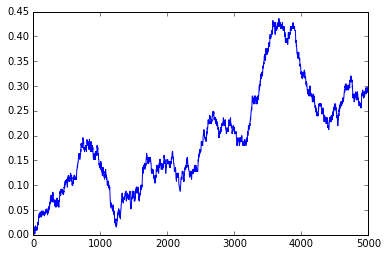

In [37]:
print "Q Values Learned", Q
plt.plot(avg_rewards)